<a href="https://colab.research.google.com/github/Jesseadriano10/LiveLensDemo/blob/Prototyping/YOLO_object_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Mar  3 21:18:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import ultralytics
from ultralytics import YOLO
from google.colab import drive
import shutil

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if (os.path.exists('/content/runs')):
  shutil.rmtree('/content/runs')

In [ ]:
from IPython.display import display, Image

ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/201.2 GB disk)


In [ ]:
import cv2

targetImage = '/content/drive/MyDrive/Capstone/09_Project_Dev/Dataset/images/1_b4-2_s_78_F.jpg'
originalImage = cv2.imread(targetImage)
convertedImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
resizedImage = cv2.resize(convertedImage, dsize=(640, 480), interpolation=cv2.INTER_CUBIC)

to do only detection just change the model to yolov8n.pt and change the task to = detect

theres a few models sizes you can pick from, s for small, m for medium, x for largest

In [ ]:
# this is for running the prediction as a command
#!yolo task=segment mode=predict model=yolov8m-seg.pt conf=0.25 source='/content/drive/MyDrive/Capstone/09_Project_Dev/Dataset/images/1_b4-2_s_78_F.jpg' save=True

In [ ]:
model = YOLO("yolov8l-seg.pt")

In [ ]:
results = model.predict(source=resizedImage, conf=0.25, save=True)
# good source for the result object https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Results


0: 480x640 1 cow, 65.1ms
Speed: 2.3ms preprocess, 65.1ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict3


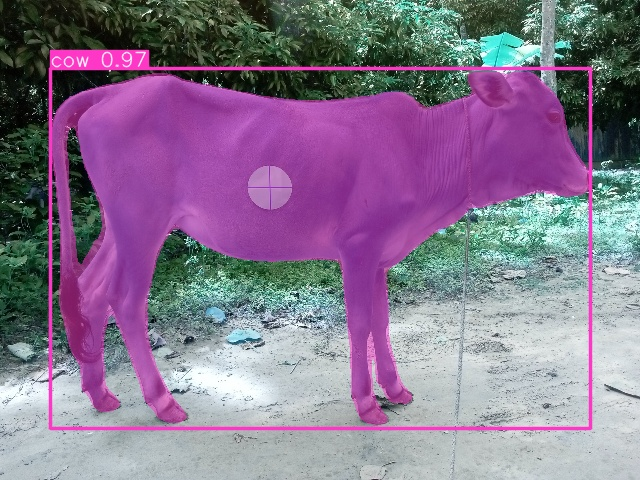

In [ ]:
Image(filename='runs/segment/predict/image0.jpg', height=600)

Handle results here

In [ ]:
print(results)

This shows the contour points

In [ ]:
obj_num = 0
contour_arr_size = (int)((results[0].masks.xy[obj_num].size)/2 -1)

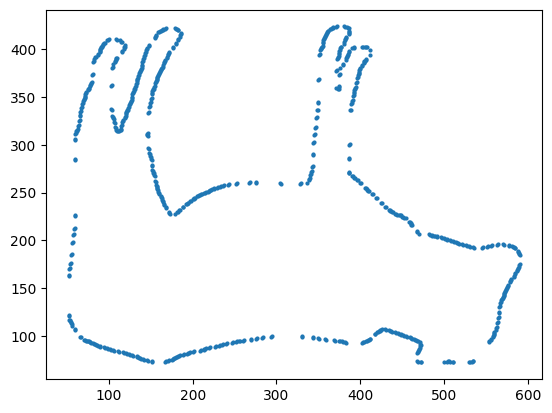

In [ ]:
x_cord = np.empty(contour_arr_size)
y_cord = np.empty(contour_arr_size)

for i in range(0, contour_arr_size):
  x_cord[i] = (results[0].masks.xy[obj_num][i][0])
  y_cord[i] = (results[0].masks.xy[obj_num][i][1])

plt.scatter(x_cord,y_cord,s=4)

The follow three functions are to be used for the demo
required packages are os, YOLO, cv2, np

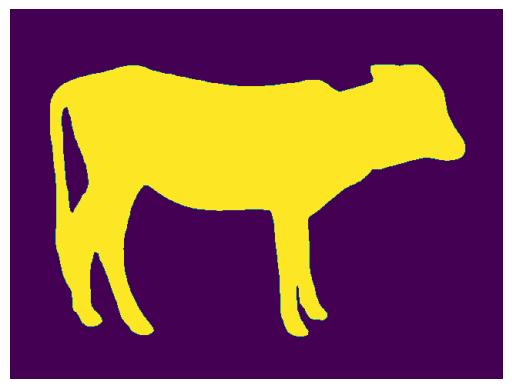

In [ ]:
def showBinaryMask(results):
    return results[0].masks.data.cpu().numpy()[0]

img = showBinaryMask(results)
plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

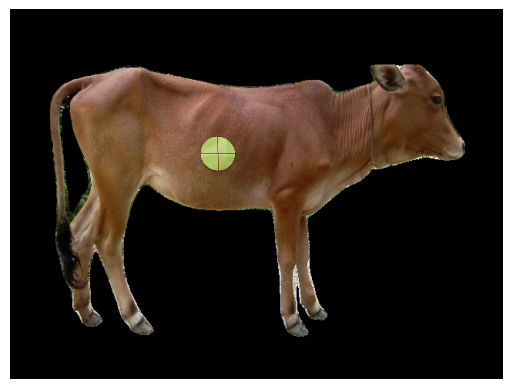

In [ ]:
def showFiltered(image, results):
    imageCopy = np.copy(image)
    return imageCopy * results[0].masks.data.cpu().numpy()[0][..., np.newaxis]

img = showFiltered(resizedImage, results)
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.show()

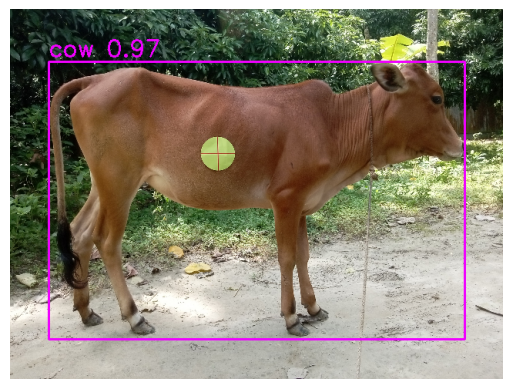

In [ ]:
def showBounding(image, results):
    imageCopy = np.copy(image)
    cv2.rectangle(imageCopy, (int(results[0].boxes.xyxy[0][0].item()), int(results[0].boxes.xyxy[0][1].item())), (int(results[0].boxes.xyxy[0][2].item()), int(results[0].boxes.xyxy[0][3].item())), (240,0,255), 2)
    cv2.putText(imageCopy, 'cow ' + str(round(results[0].boxes.conf[0].item(), 2)), (int(results[0].boxes.xyxy[0][0].item()), int(results[0].boxes.xyxy[0][1].item()) - 7), cv2.FONT_HERSHEY_SIMPLEX, 1, (240,0,255), 2)
    return imageCopy

img = showBounding(resizedImage, results)
plt.imshow(img)
plt.axis('off')
plt.show()